<img src="https://i.imgur.com/Jlvvddg.png" align=center> 

# CMEMS_1 VIEW UPWELLING 
# Physical/Biogeochemical Processes of Portugal and west of Galicia 


## Analyze of an **upwelling** event on biogeochemical traces



***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
<br>
**General Note 3**: Download the file with all dependencies and unzip while preserving file structure in the same directory as the notebook: [Download dependency file](https://atlas.mercator-ocean.fr/s/DWmmWz22eE6MKcF)<br>
***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. High resolution Impact](#2.-High-resolution)
- [3. Sea Surface Temperature, Nitrate and Chlorophyll](#3.-Sea-Surface-Temperature,-Nitrate-and-Chlorophyll)
- [4. Moorings: Time series of SST, Nitrate and Chlorophyll](#4.-Mooring)
***

# 1. Introduction

Upwelling is an oceanographic phenomenon that involves wind-driven motion of dense, cooler, and nutrient-rich water towards the ocean surface, replacing the warmer, nutrient-depleted surface water (Figure1).

<img src=https://i.imgur.com/8VGv81A.png width="500" >  

Coastal <font color='blue'>upwelling</font> is a typical feature along the West Iberian coast.
During spring and summer northerly winds along the coast are dominant, causing coastal upwelling and producing a southward current at the surface (Figure 2)
In autumn and winter, the surface circulation is predominantly northwards, partially driven by southward winds, and transporting higher salinity, nutrient-poor and warmer (subtropical) waters over the shelf break (Figure 2).
Winter upwelling events can also be observed, upwelling being very sensitive to slight changes in the wind. Run-off from several major rivers from the northwestern coast of Portugal and the Galician Rias are also intensified during winter time.

<img src=https://i.imgur.com/5d0Veoe.png width="750" >  

We compare the ocean state in june, August adn Septempber 2014 based on different simulations: 

- **REA-GLORYS  :** the Global Ocean Reanalysis at 1⁄4°
- **REA-IBI     :** the Atlantic-Iberian Biscay Irish- Ocean Reanalysis at 1/12°
- **NRT-IBI     :** the Atlantic-Iberian Biscay Irish- Ocean Analysis at 1/36°
- **Satellite   :** SST: multi-sensor L3 product at 0.02°; Chlorophyll : ESA CCI 4km

SST and Chlorophyll off Portugal are compared to satellite products.


# 2. High resolution  
**OBJECTIVE:** Compare distinct simulations (Global and regional) with different resolution to evaluate the benefits of regional and high-resolution products

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) allows carrying out scientific computing with Python and managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) handles netCDF files in an intuitive and interactive way. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python numerical plotting library |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting 2D data on maps. |

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [2]:
color = 'jet'






The following cell displays the sea surface temperature (SST) of the 3 models and the satellite product for June 2014.

In [3]:
# define the paths of the netcdf files to use
path_file1 = 'VIEW/UPWELLING/DATA/high_resolution/IBIRYSV1R1_1dAV_20140616_20140617_gridT_R20140621_new.nc'
path_file2 = 'VIEW/UPWELLING/DATA/high_resolution/GLORYS2V3_1dAV_20140616_20140617_gridT_R20140618.nc'
path_file3 = 'VIEW/UPWELLING/DATA/high_resolution/MF_CMS_IBI36V5R5_NEATL_20140616.nc'

# open the netcdf files
file1 = xr.open_dataset(path_file1)
file2 = xr.open_dataset(path_file2)
file3 = xr.open_dataset(path_file3)

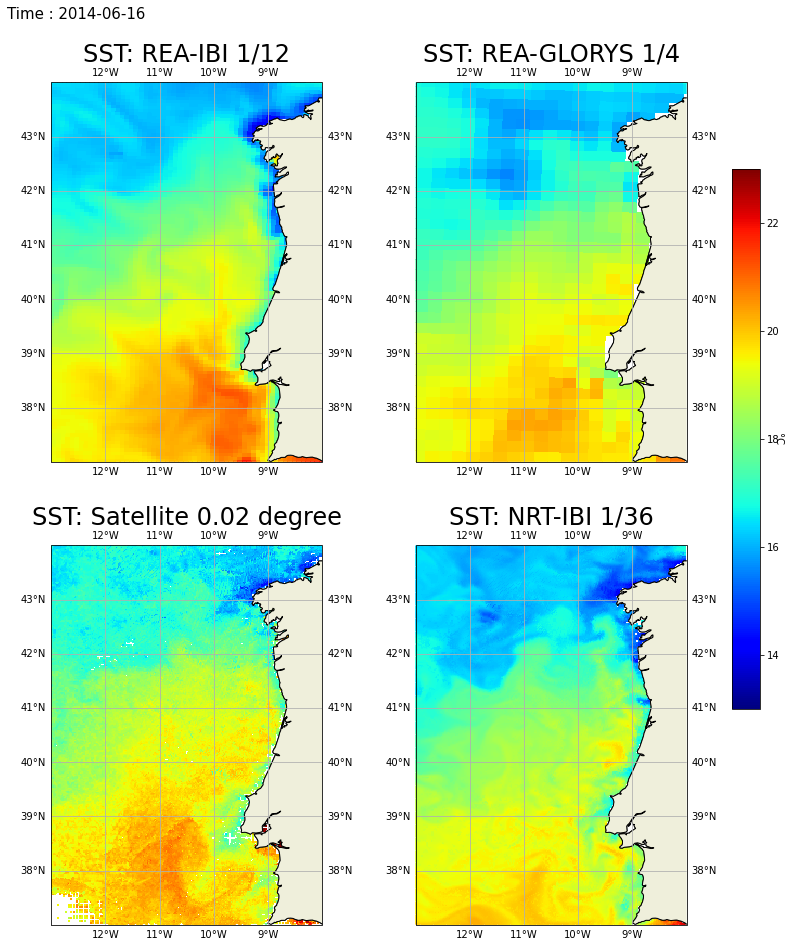

In [4]:
# define the caracteristics of the map and the features to plot
f = plt.figure(figsize=(13, 15))
ax1 = f.add_subplot(221,projection=ccrs.PlateCarree())
ax2 = f.add_subplot(222,projection=ccrs.PlateCarree())
ax3 = f.add_subplot(223,projection=ccrs.PlateCarree())
ax4 = f.add_subplot(224,projection=ccrs.PlateCarree())

for ax in [ax1, ax2, ax3, ax4]: 
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
    ax.set_extent([-13, -8, 37, 44],crs=ccrs.PlateCarree())


# add the date on the plot
date = np.datetime_as_string(file1['time_counter'].data[0],unit='D')
plt.suptitle('Time : ' +date,fontsize = 15, x = 0.2, y = 0.95)

# upper left plot
ax1.set_title("SST: REA-IBI 1/12",fontsize=24)
im = ax1.pcolor(file1['nav_lon'].data[150:270,80:150], file1['nav_lat'].data[150:270,80:150],file1['votemper'].data[0,0,150:270,80:150],vmin = 13, vmax= 23,cmap = color,shading='nearest')

#upper right plot
ax2.set_title("SST: REA-GLORYS 1/4",fontsize=24)
im = ax2.pcolor(file2['nav_lon'].data[40:100,20:50], file2['nav_lat'].data[40:100,20:50],file2['votemper'].data[0,0,40:100,20:50],vmin = 13, vmax= 23,cmap = color,shading='nearest')

# lower left plot
ax3.set_title("SST: Satellite 0.02 degree",fontsize=24)
im = ax3.pcolor(file3['lon'].data[355:605], file3['lat'].data[550:900],np.array(file3['adjusted_sea_surface_temperature'].data[0,550:900,355:605])-273.15,vmin = 13, vmax= 23,cmap = color,shading='nearest')

# lower right plot
ax4.set_title("SST: NRT-IBI 1/36",fontsize=24)
im = ax4.pcolor(file3['lon'].data[355:605], file3['lat'].data[550:900],np.array(file3['MOD_COLOC'].data[0,550:900,355:605])-273.15,vmin = 13, vmax= 23,cmap = color,shading='nearest')

# legend
cbar_ax = f.add_axes([0.9, 0.3, 0.03, 0.5])
f.subplots_adjust(right = 0.9, bottom = 0.1, hspace= 0.22,wspace=0.01)
cbar =f.colorbar(im,cax=cbar_ax)
cbar.set_label('°C', rotation=270)

# save 
plt.savefig('VIEW/UPWELLING/FIGURES/high_resolution/high_resolution_SST_20140616.png')

To plot SST and chlorphyll over 3 dates (June 2014 - August 2014 - September 2014), you can launch a terminal from the directory **VIEW/UPWELLING/SCRIPTS/** and type :

- **python  high_resolution.py**



The figures are saved in **VIEW/UPWELLING/FIGURES/high_resolution**

<img src=https://i.imgur.com/e1Feqsn.png width="600" >  


<img src=https://i.imgur.com/35YChCX.png width="750" >  



<div class="alert alert-block alert-info">
<b>Conclusion :</b>  NRT-IBI regional product includes the last version of NEMO-PISCES code, regional developments and adaptations as well as a higher resolution, improving the upwelling of cold waters and the answer of Chlorophyll.
</div>

# 3. Sea Surface Temperature, Nitrate and Chlorophyll

**OBJECTIVE:** using the regional product at 1/36°, visualize daily images for 2014, and understand the link between sea surface temperature, nitrate and chlorophyll


The following cell displays temperature, nitrate and chlorophyle for one date.

In [5]:
# define the paths of the netcdf files to use
path_file1 = 'VIEW/UPWELLING/DATA/animation/NEATL36_1d_gridT_2014.nc'
path_file2 = 'VIEW/UPWELLING/DATA/animation/NEATL36_1d_gridNO3_2014.nc'
path_file3 = 'VIEW/UPWELLING/DATA/animation/NEATL36_1d_gridCHL_2014.nc'

# open the netcdf files
file1 = xr.open_dataset(path_file1)
file2 = xr.open_dataset(path_file2)
file3 = xr.open_dataset(path_file3)

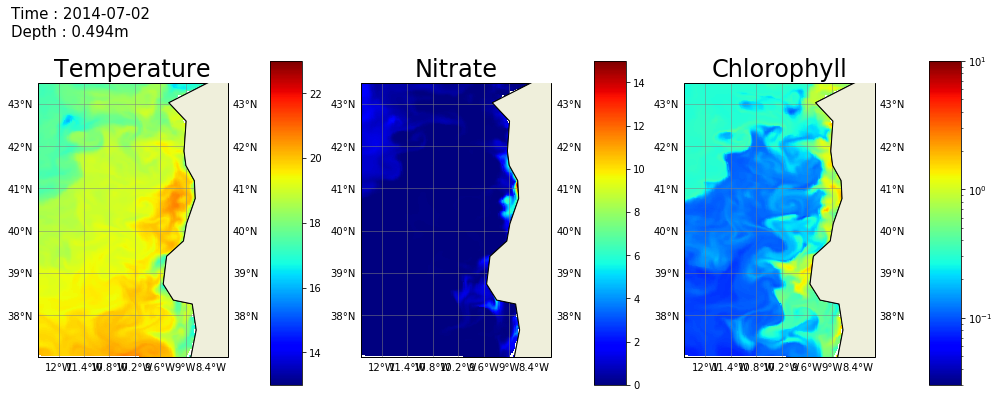

In [6]:
# define the caracteristics of the map and the features to plot
f = plt.figure(figsize=(15,15))
ax1 = f.add_subplot(131,projection=ccrs.PlateCarree())
ax2 = f.add_subplot(132,projection=ccrs.PlateCarree())
ax3 = f.add_subplot(133,projection=ccrs.PlateCarree())

for ax in [ax1, ax2, ax3]: 
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='gray', alpha=0.5)
    gl.xlabels_top = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.add_feature(cfeature.LAND, zorder=5, edgecolor='k')
    ax.set_extent([-12.5, -8, 37, 43.5],crs=ccrs.PlateCarree())


# adjust the margins and add the date
f.subplots_adjust(hspace = 0.7,wspace=0.7)
date = np.datetime_as_string(file1['time_counter'].data[182],unit='D')
depth = str(round(file1['deptht'].data[0],4))
plt.suptitle('Time : ' +date +'\nDepth : ' + depth + 'm',fontsize = 15, x = 0.1, y = 0.7,horizontalalignment='left')

# first plot
ax1.set_title("Temperature",fontsize=24)
im1 = ax1.pcolor(file1['nav_lon'].data, file1['nav_lat'].data,file1['votemper'].data[182,0],vmin = 13, vmax= 23,cmap = color,shading='nearest')
cbar_ax1 = f.add_axes([0.34, 0.35, 0.03, 0.3])
f.colorbar(im1,cax=cbar_ax1)


#second plot
ax2.set_title("Nitrate",fontsize=24)
im2 = ax2.pcolor(file2['nav_lon'].data, file2['nav_lat'].data,file2['NO3'].data[182,0],vmin = 0, vmax= 15,cmap = color,shading='nearest')
cbar_ax2 = f.add_axes([0.64, 0.35, 0.03, 0.3])
f.colorbar(im2,cax=cbar_ax2)

# third plot
ax3.set_title("Chlorophyll",fontsize=24)
im3 = ax3.pcolor(file2['nav_lon'].data, file2['nav_lat'].data,file3['CHL'].data[182,0],vmin = 0.03, vmax= 10,cmap = color,norm=colors.LogNorm(vmin=0.03, vmax=10),shading='nearest')
cbar_ax3 = f.add_axes([0.95, 0.35, 0.03, 0.3])
f.colorbar(im3,cax=cbar_ax3)

plt.savefig('VIEW/UPWELLING/FIGURES/animation/test.png')

To plot these figures for each day of one season (winter/spring/summer/automn), you can launch a terminal from the directory **VIEW/UPWELLING/SCRIPTS/** and type :

- **python  animation_season.py**


The figures are saved in **VIEW/UPWELLING/FIGURES/animation**

# 4. Mooring  

**OBJECTIVE:** using the regional product at 1/36°, visualize daily images for 2014, and understand the link between sea surface temperature, nitrate and chlorophyll using the regional product at 1/36°, Time series of SST, Nitrate and Chlorophyll are analyzed at a fixed point. Understand the link between phytoplankton bloom and upwelling.


In [9]:
# define the path of the netcdf file and open the file
path_file1 =  'VIEW/UPWELLING/DATA/mooring/IBI36V5R5_CLASS2_MOO_Ferrol_20130227_20150601.nc'
file1 = xr.open_dataset(path_file1)

# define the coordinates
lon = str(round(file1['longitude'].data[0],4))+'E'
lat = str(round(file1['latitude'].data[0],4))+'N'
depth = str(round(file1['deptht'].data[0],4)) + 'm' 

color = 'viridis'

First, let's see the location of the mooring.

Text(0.5, 1.0, 'Location of the mooring')

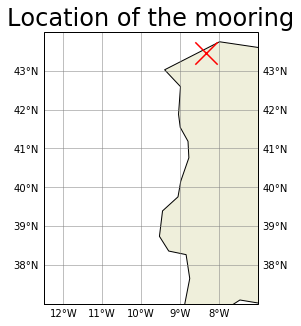

In [25]:
f = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='gray', alpha=0.5)
gl.xlabels_top = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='k')
ax.set_extent([-12.5, -7, 37, 44],crs=ccrs.PlateCarree())

ax.scatter(file1['longitude'].data[0],file1['latitude'].data[0],marker='x',s=500,c='r')
ax.set_title("Location of the mooring",fontsize=24)

In [13]:
print(file1['longitude'].data[0])
print(file1['latitude'].data[0])

-8.321991
43.453144


The following cell displays the time series of surface temperature, surface nitrate and surface chlorophyll over 3 years. 

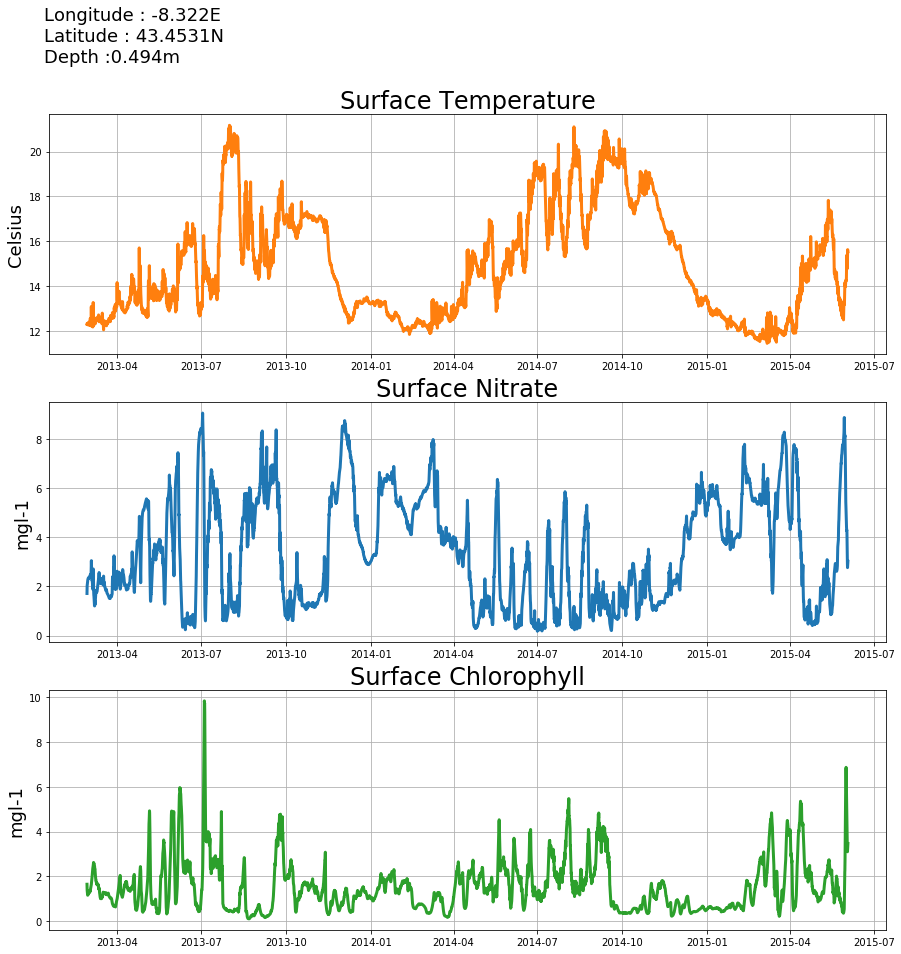

In [71]:
# define the caracteristics of the plot  
f = plt.figure(figsize=(15,15))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

# add the coordinates to the plot
f.suptitle('Longitude : ' +lon +'\nLatitude : ' + lat + '\nDepth :' + depth,fontsize=18,horizontalalignment='left',x=0.12)

# first plot
ax1.set_title("Surface Temperature",fontsize=24)
ax1.grid()
ax1.set_ylabel("Celsius",fontsize=18)

ax1.plot(np.array(file1['time']),file1['votemper'].data[:,0,0,0],c='tab:orange',linewidth=3)

# second plot
ax2.set_title("Surface Nitrate",fontsize=24)
ax2.grid()
ax2.set_ylabel("mgl-1",fontsize=18)

ax2.plot(np.array(file1['time']),file1['NO3'].data[:,0,0,0],c='tab:blue',linewidth=3)


# third plot
ax3.set_title("Surface Chlorophyll",fontsize=24)
ax3.grid()
ax3.set_ylabel("mgl-1",fontsize=18)

ax3.plot(np.array(file1['time']),file1['CHL'].data[:,0,0,0],c='tab:green',linewidth=3)

#save 
plt.savefig('VIEW/UPWELLING/FIGURES/mooring/time_series_Ferrol_2013-2015.png')


The following cell displays a zoom of the previous figure for the year 2014.

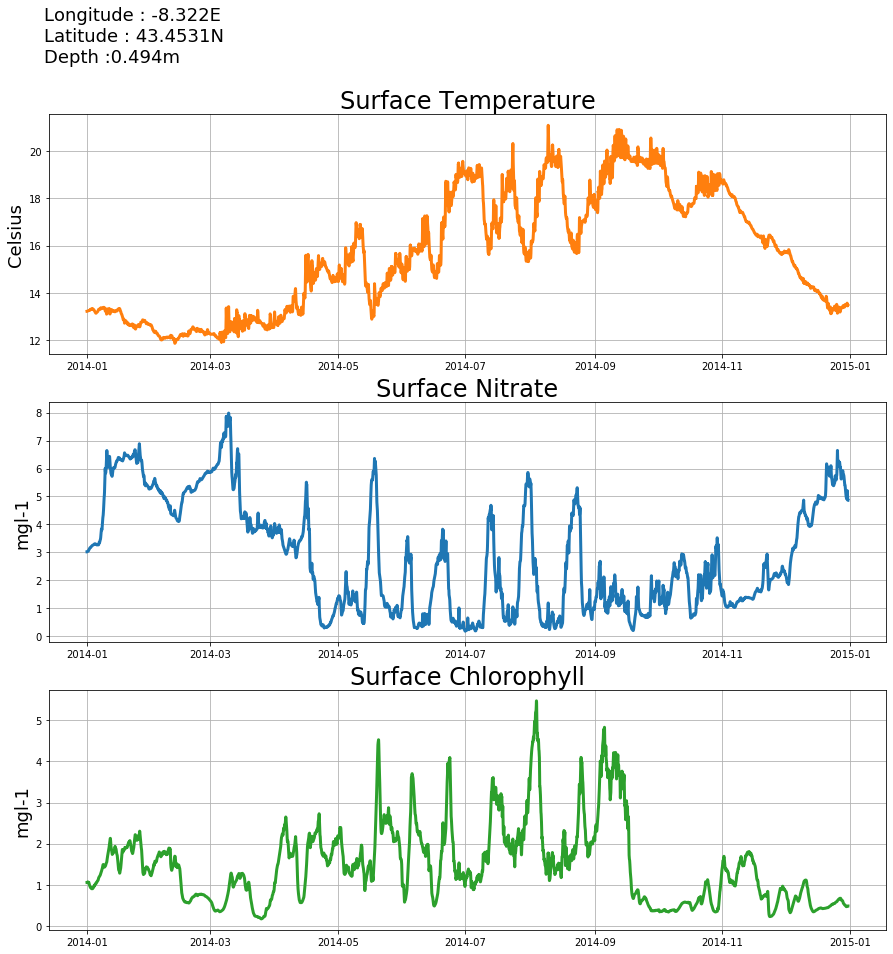

In [73]:
# define the first and last dates
date1 = np.datetime64('2014-01-01')
date2 = np.datetime64('2014-12-31')

# define the caracteristics of the plot  
f = plt.figure(figsize=(15,15))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

# add the coordinates to the plot
f.suptitle('Longitude : ' +lon +'\nLatitude : ' + lat + '\nDepth : ' + depth,fontsize=18,horizontalalignment='left',x=0.12)

#first plot
ax1.set_title("Surface Temperature",fontsize=24)
ax1.grid()
ax1.set_ylabel("Celsius",fontsize=18)
ax1.plot(file1['time'].sel(time=slice(date1,date2)),file1['votemper'].sel(time=slice(date1,date2))[:,0,0,0],c='tab:orange',linewidth=3)

# second plot
ax2.set_title("Surface Nitrate",fontsize=24)
ax2.grid()
ax2.set_ylabel("mgl-1",fontsize=18)
ax2.plot(file1['time'].sel(time=slice(date1,date2)),file1['NO3'].sel(time=slice(date1,date2))[:,0,0,0],c='tab:blue',linewidth=3)

# third plot
ax3.set_title("Surface Chlorophyll",fontsize=24)
ax3.set_ylabel("mgl-1",fontsize=18)
ax3.grid()

ax3.plot(file1['time'].sel(time=slice(date1,date2)),file1['CHL'].sel(time=slice(date1,date2))[:,0,0,0],c='tab:green',linewidth=3)


# save
#plt.savefig('VIEW/UPWELLING/FIGURES/mooring/time_series_Ferrol_2014.png')


This final cell displays the vertical profiles of the 3 parameters over the year 2014.

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


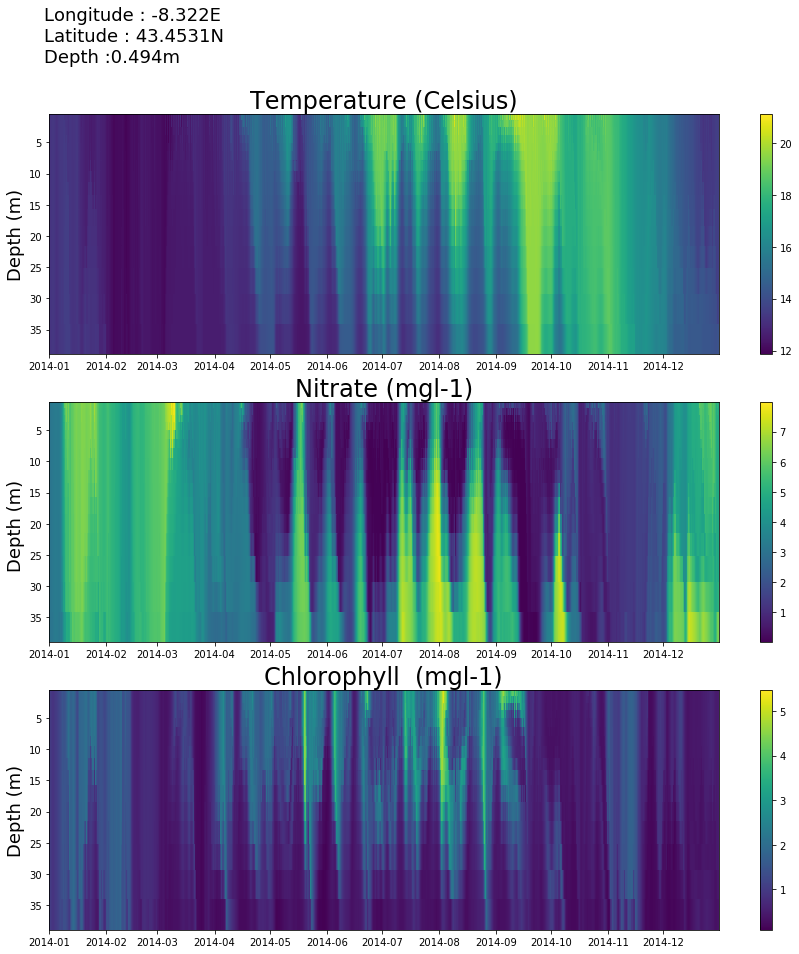

In [26]:
# define the first and last dates
date1 = np.datetime64('2014-01-01')
date2 = np.datetime64('2014-12-31')

# define the caracteristics of the plot
f = plt.figure(figsize=(15,15))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

# add the coordinates to the plot
f.suptitle('Longitude : ' +lon +'\nLatitude : ' + lat + '\nDepth :' + depth,fontsize=18,horizontalalignment='left',x=0.12)

# first plot 
ax1.set_title("Temperature (Celsius)",fontsize=24)
ax1.set_ylabel("Depth (m)",fontsize=18)
ax1.invert_yaxis()
im1 = ax1.pcolor(file1['time'].sel(time=slice(date1,date2)),
                 file1['deptht'],
                 np.transpose(file1['votemper'].sel(time=slice(date1,date2)).data[:,:,0,0]),
                 cmap = color)

f.colorbar(im1,ax=ax1)

# second plot
ax2.set_title("Nitrate (mgl-1)",fontsize=24)
ax2.set_ylabel("Depth (m) ",fontsize=18)
ax2.invert_yaxis()
im2 =ax2.pcolor(file1['time'].sel(time=slice(date1,date2)),
                file1['deptht'],
                np.transpose(file1['NO3'].sel(time=slice(date1,date2)).data[:,:,0,0]),
                cmap = color)
f.colorbar(im2,ax=ax2)

# third plot

ax3.set_ylabel("Depth (m)",fontsize=18)
ax3.set_title("Chlorophyll  (mgl-1)",fontsize=24)
ax3.invert_yaxis()
im3 =ax3.pcolor(file1['time'].sel(time=slice(date1,date2)),
                file1['deptht'],
                np.transpose(file1['CHL'].sel(time=slice(date1,date2)).data[:,:,0,0]),
                cmap = color)
f.colorbar(im3,ax=ax3)

# save
plt.savefig('VIEW/UPWELLING/FIGURES/mooring/time_series_Ferrol_2014_vertical.png')


# 5. References

-*Ruiz-Villarreal, M., Gonzalez-Pola, C., Diaz del Rio, G., Lavin, A., Otero, P., Piedracoba, S., and Cabanas, J. M. 2006. Oceanographic conditions in North and Northwest Iberia and their influence on the Prestige oil spill. Marine Pollution Bulletin, 53: 220–238.*

-*Maraldi, C., Chanut, J., Levier, B., Ayoub, N., De Mey, P., Reffray, G., Lyard, F., Cailleau, S., Drévillon, M., Fanjul, E. A., Sotillo, M. G., Marsaleix, P., and the Mercator Research and Development Team: NEMO on the shelf: assessment of the Iberia–Biscay–Ireland configuration, Ocean Sci., 9, 745-771, doi:10.5194/os-9-745-2013, 2013.*


-*Evan Mason, Steve Coombs  and Paulo B. Oliveira : AN OVERVIEW OF THE LITERATURE CONCERNING THE OCEANOGRAPHY OF THE EASTERN NORTH ATLANTIC REGION, Cient. Téc. IPIMAR, Série digital (http://ipimar-iniap.ipimar.pt) nº 33, 58 pp.*